importare equity
verificare stazionarietà (I(0))
se non I0 differenziare
verificare stazionarietà
se non differenziare etc

verificare cointegrazione

In [21]:
'''
!pip3 uninstall statsmodels
!pip3 install numpy scipy patsy pandas
!pip3 install statsmodels
''';

In [22]:
#!pip install arch

In [23]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller, kpss
import datetime as dt
from arch.unitroot import ADF, KPSS
from arch.unitroot.cointegration import phillips_ouliaris
from statsmodels.tsa.ardl import UECM
from statsmodels.stats.stattools import durbin_watson

enddate = dt.datetime.strptime("2024-03-31", "%Y-%m-%d").date()
startdate = enddate - dt.timedelta(days=365*12) # for 5 years
# Download stock data
ticker = ['VOW3.DE', 'MBG.DE', 'BMW.DE']   # Replace with desired ticker symbol
df = yf.download(ticker, start=startdate, end=enddate)
df = df['Adj Close']
df

[*********************100%%**********************]  3 of 3 completed


Ticker,BMW.DE,MBG.DE,VOW3.DE
Date,,,
2012-04-03,39.700474,19.516720,80.930000
2012-04-04,38.865467,19.064676,78.709824
2012-04-05,38.993927,19.425045,78.436096
2012-04-10,38.001274,18.500366,76.094269
2012-04-11,38.953056,18.722469,78.344864
...,...,...,...
2024-03-22,104.120003,73.500000,118.080002
2024-03-25,106.239998,73.720001,119.379997
2024-03-26,106.559998,73.449997,121.260002


In [24]:
def stat(data, symbol):
   # data =dt.loc[:, ["Date", ]].set_index("Date")
    # Calculate daily returns
    data["Returns"] = data[symbol].pct_change()
    # Check for heteroscedasticity with a scatter plot\n",
    plt.scatter(data.index, data["Returns"])
    plt.xlabel("Date")
    plt.xticks(rotation=90)
    plt.ylabel("Daily Return")
    plt.title("Scatter Plot of Daily Returns for " + symbol)
    plt.show()
    # Visualize volatility changes over time (may indicate heteroscedasticity)
    plt.scatter(data.index, data["Returns"].rolling(window=30).std())
    plt.xlabel("Date")
    plt.xticks(rotation=90)
    plt.ylabel("Rolling Standard Deviation")
    plt.title("Rolling Volatility for " + symbol)
    plt.show()

    print(KPSS(data[symbol], trend="ct", lags=-1))


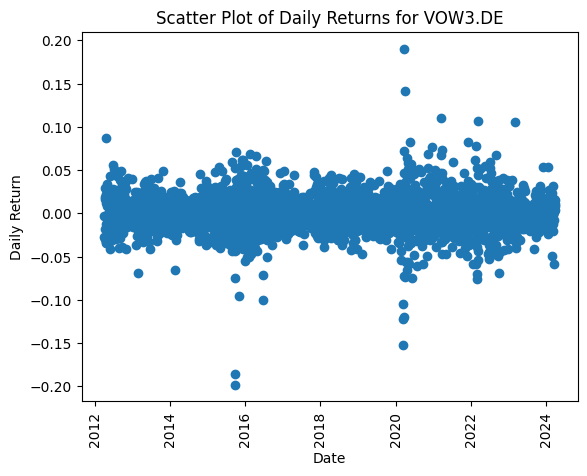

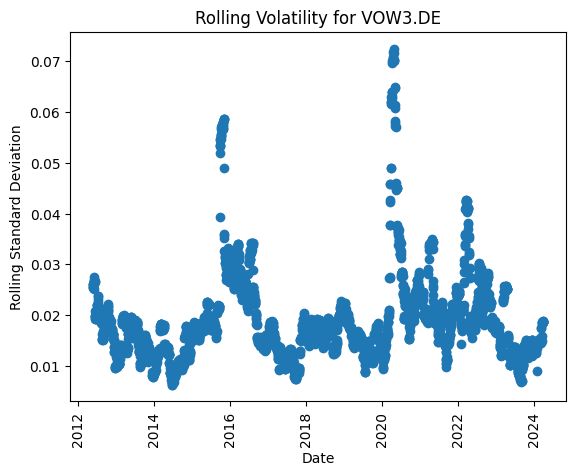

    KPSS Stationarity Test Results   
Test Statistic                  0.398
P-value                         0.000
Lags                               29
-------------------------------------

Trend: Constant and Linear Time Trend
Critical Values: 0.22 (1%), 0.15 (5%), 0.12 (10%)
Null Hypothesis: The process is weakly stationary.
Alternative Hypothesis: The process contains a unit root.


In [25]:
stat(df, 'VOW3.DE')

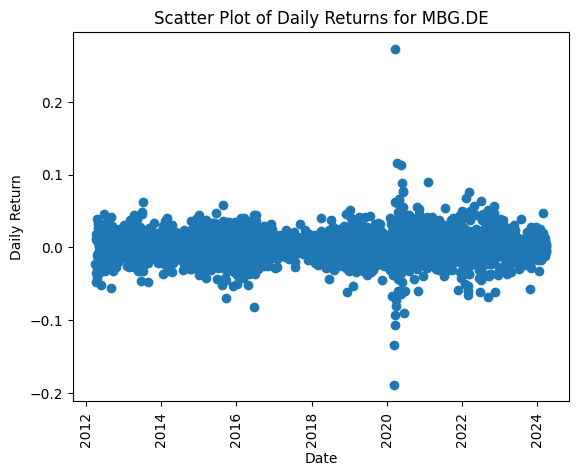

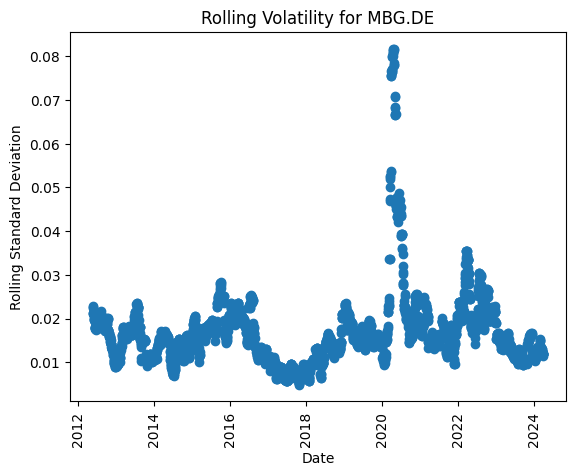

    KPSS Stationarity Test Results   
Test Statistic                  1.044
P-value                         0.000
Lags                               29
-------------------------------------

Trend: Constant and Linear Time Trend
Critical Values: 0.22 (1%), 0.15 (5%), 0.12 (10%)
Null Hypothesis: The process is weakly stationary.
Alternative Hypothesis: The process contains a unit root.


In [26]:
stat(df, 'MBG.DE')

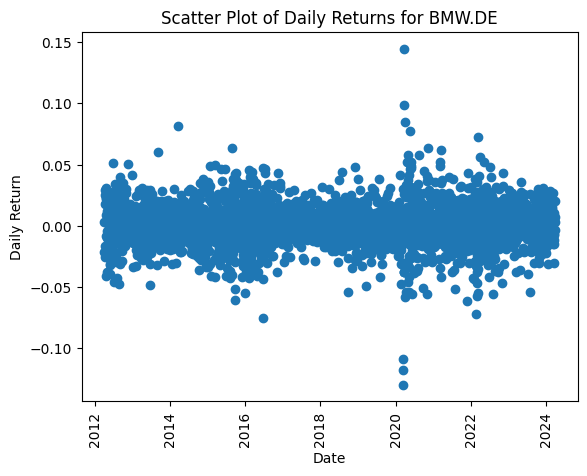

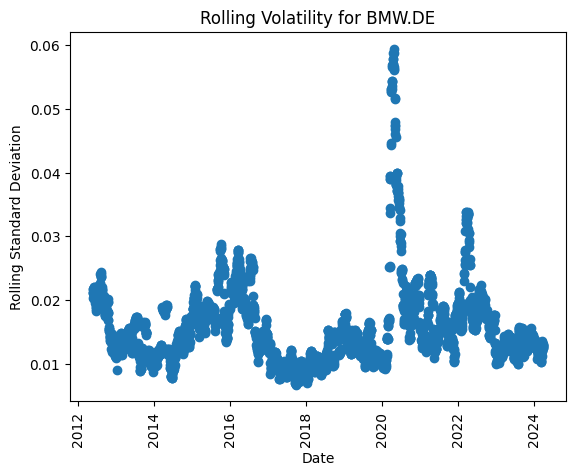

    KPSS Stationarity Test Results   
Test Statistic                  1.054
P-value                         0.000
Lags                               29
-------------------------------------

Trend: Constant and Linear Time Trend
Critical Values: 0.22 (1%), 0.15 (5%), 0.12 (10%)
Null Hypothesis: The process is weakly stationary.
Alternative Hypothesis: The process contains a unit root.


In [27]:
stat(df, 'BMW.DE')

In [28]:
print('p-vaue is 0 for these OEM securities, so we cannot reject the null hypotesis and the time series have a unit root, \nwith a constant and linear trend')

p-vaue is 0 for these OEM securities, so we cannot reject the null hypotesis and the time series have a unit root, 
with a constant and linear trend


In [29]:
def logADF(data,ticker):
    for symbol in ticker:
        logged = np.log(data[symbol]).diff().dropna()
        print('ADF for {}\n\n'.format(symbol), ADF(logged, trend="n", method="bic"), '\n\n')

In [30]:
logADF(df,ticker)

ADF for VOW3.DE

    Augmented Dickey-Fuller Results   
Test Statistic                -50.159
P-value                         0.000
Lags                                0
-------------------------------------

Trend: No Trend
Critical Values: -2.57 (1%), -1.94 (5%), -1.62 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary. 


ADF for MBG.DE

    Augmented Dickey-Fuller Results   
Test Statistic                -53.648
P-value                         0.000
Lags                                0
-------------------------------------

Trend: No Trend
Critical Values: -2.57 (1%), -1.94 (5%), -1.62 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary. 


ADF for BMW.DE

    Augmented Dickey-Fuller Results   
Test Statistic                -53.824
P-value                         0.000
Lags                                0
-------------------------------------

Trend: No Tre

In [31]:
print('Test Statistics for logged time series are (far) lower than Critical Values, so there is no tend in the logged time series.\nNo need to apply difference+log')

Test Statistics for logged time series are (far) lower than Critical Values, so there is no tend in the logged time series.
No need to apply difference+log


In [32]:
print(
    phillips_ouliaris(
        df['VOW3.DE'], df['MBG.DE'], trend="c", test_type="Za", kernel="bartlett"
    )
)
# , df['BMW.DE']

Phillips-Ouliaris Za Cointegration Test
Statistic: -17.866015873112413
P-value: 0.08652884297045565
Null: No Cointegration, Alternative: Cointegration
Kernel: Bartlett
Bandwidth: 9.0071
Trend: c
Distribution Order: 3


In [33]:
print(
    phillips_ouliaris(
        df['VOW3.DE'], df['BMW.DE'], trend="c", test_type="Za", kernel="bartlett"
    )
)
# , df['BMW.DE']

Phillips-Ouliaris Za Cointegration Test
Statistic: -15.922547252665288
P-value: 0.12528195654681357
Null: No Cointegration, Alternative: Cointegration
Kernel: Bartlett
Bandwidth: 8.3233
Trend: c
Distribution Order: 3


In [34]:
print(
    phillips_ouliaris(
        df['BMW.DE'], df['MBG.DE'], trend="c", test_type="Za", kernel="bartlett"
    )
)
# , df['']

Phillips-Ouliaris Za Cointegration Test
Statistic: -21.331708129478532
P-value: 0.04276322992405608
Null: No Cointegration, Alternative: Cointegration
Kernel: Bartlett
Bandwidth: 11.595
Trend: c
Distribution Order: 3


In [35]:
print('p-vaue is >5% for VOW3.DE < > BMW.DE and VOW3.DE <> MBG.DE, \nso we can reject the null hypotesis and these time series have cointegration\n\nwhereas p-value is < 5% for VOW3.DE <> BMW.DE \nso we can reject the null hypotesis and these time series do not have cointegration')

p-vaue is >5% for VOW3.DE < > BMW.DE and VOW3.DE <> MBG.DE, 
so we can reject the null hypotesis and these time series have cointegration

whereas p-value is < 5% for VOW3.DE <> BMW.DE 
so we can reject the null hypotesis and these time series do not have cointegration


In [37]:
# Error Correction Model Result for VOW3.DE on BMW.DE
ecm_model = UECM(
    endog=pd.DataFrame(df['VOW3.DE']),
    lags=1,
    exog=pd.DataFrame( df['BMW.DE']),
    order=1,
    trend="c",
).fit()
print(ecm_model.summary())
# all coefficient estimates are significant, i.e. 𝜆 is AUDUSD.L1 = -0.0157, which meets our criteria to be between 00 and −1

# Durbin-Watson Test Result for ECM of AUDUSD and NZDUSD
print(durbin_watson(ecm_model.fittedvalues))
# residuals are serially uncorrelated, which is the ECM model required for the residuals.


                              UECM Model Results                              
Dep. Variable:              D.VOW3.DE   No. Observations:                 3042
Model:                     UECM(1, 1)   Log Likelihood               -5582.027
Method:               Conditional MLE   S.D. of innovations            111.881
Date:                Tue, 09 Apr 2024   AIC                          11174.054
Time:                        06:29:42   BIC                          11204.154
Sample:                             1   HQIC                         11184.873
                                 3042                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.3237      0.152      2.134      0.033       0.026       0.621
VOW3.DE.L1     -0.0031      0.001     -2.102      0.036      -0.006      -0.000
BMW.DE.L1      -0.0001      0.002     -0.053    

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
